In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def d_angular( U,dx,dy,z,W_length):
    freq_U=np.fft.fftshift(np.fft.fft2(U)) 
    N,M =np.shape(U)
    x=np.arange(-int(M/2),int(M/2),1)
    y=np.arange(-int(N/2),int(N/2),1)
    
    X,Y=np.meshgrid(x,y)
    k=(2*np.pi)/W_length
    dfx=X*1/(M*dx)
    dfy=Y*1/(N*dy)
    
    c1=1j*z*k
    matrix= np.exp(c1*np.sqrt(1-((W_length**2)*(dfx**2+dfy**2))))
    matrix2=freq_U*matrix
    matrix3=np.fft.ifft2(matrix2)
    
    return matrix3
    


In [3]:
%matplotlib qt

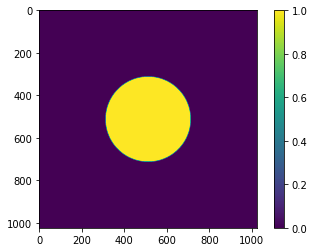

In [3]:
mascara=np.zeros((1024,1024))
cv.circle(mascara,(int(1024/2), int(1024/2)),200,1,-1)
plt.figure()
plt.imshow(mascara)
plt.colorbar()
plt.show()

In [5]:
um=1e-6
mm=1e-3
nm=1e-9
dx=600*nm
dy=600*nm
w=632.8*nm
z1=500*um

pu=d_angular(mascara,dx,dy,z1,w)
plt.figure()
plt.imshow((np.abs(pu)**2))
plt.colorbar()
plt.show()

In [6]:
def fresnel_zones_circular(r,z,w_length):
    zones=(r**2)/(z*w_length)
    return zones

In [7]:
fzones=fresnel_zones_circular(200*dy,4.55*mm,w)
print(fzones)

5.001319792723081


In [8]:
def z_critic(m,dx,w):
    zcr=(m*(dx**2))/w
    return zcr

In [23]:
zcr1=z_critic(1024,dx,w)
print(zcr1)

0.0005825537294563845


In [10]:
deltaminimo=1/(1/(700*nm))
print(deltaminimo)

7.000000000000001e-07


In [29]:
def T_fresnel( U,dx,dy,z,W_length):
    N,M =np.shape(U)
    x=np.arange(-int(M/2),int(M/2),1)
    y=np.arange(-int(N/2),int(N/2),1)
    
    X,Y=np.meshgrid(x,y)
    k=(2*np.pi)/W_length
    dx0=X*(dx)
    dy0=Y*(dy)
    
    c1=(1j*k)/(2*z)
    matrix= np.exp(c1*(dx0**2+dy0**2))
    matrix2=U*matrix
    matrix3=np.fft.fftshift(np.fft.fft2(matrix2))
    
    x1=np.arange(-int(M/2),int(M/2),1)
    y1=np.arange(-int(N/2),int(N/2),1)
    X1,Y1=np.meshgrid(x1,y1)
    dx1=X1*((W_length*z)/(M*dx))
    dy1=Y1*((W_length*z)/(N*dy))
    
    c2=np.exp(1j*k*z)
    c3=1j*W_length*z
    c4=c2/c3
    matrix4= c4*np.exp(c1*(dx1**2+dy1**2))
    U_final=matrix3*matrix4
    
    
    return U_final

In [28]:
z2=1*mm
pu2=T_fresnel(mascara,dx,dy,z2,w)
plt.figure()
plt.imshow((np.abs(pu2)**2))
plt.colorbar()
plt.show()

In [13]:
def dft_2D(matrix):
    data = np.asarray(matrix)
    M, N = np.shape(data) 
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = np.exp(- 2j * np.pi * ((k * m) / M + (l * n) / N))
                    sum_matrix +=  data[m,n] * e
            dft2d[k,l] = sum_matrix
    return dft2d

In [14]:
def idft_2D(matrix):
    data = np.asarray(matrix)
    M, N = np.shape(data) 
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = np.exp( 2j * np.pi * ((k * m) / M + (l * n) / N))
                    sum_matrix +=  data[m,n] * e
            dft2d[k,l] = sum_matrix
    return dft2d

In [15]:
def d_angular_dft( U,dx,dy,z,W_length):
    freq_U=np.fft.fftshift(dft_2D(U)) 
    N,M =np.shape(U)
    x=np.arange(-int(M/2),int(M/2),1)
    y=np.arange(-int(N/2),int(N/2),1)
    
    X,Y=np.meshgrid(x,y)
    k=(2*np.pi)/W_length
    dfx=X*1/(M*dx)
    dfy=Y*1/(N*dy)
    
    c1=1j*z*k
    matrix= np.exp(c1*np.sqrt(1-((W_length**2)*(dfx**2+dfy**2))))
    matrix2=freq_U*matrix
    matrix3=idft_2D(matrix2)
    
    return matrix3
    

In [16]:

dx3=10*um
dy3=10*um
w3=632.8*nm
z3=20*um
zcr1=z_critic(50,dx,w)
print(zcr1)

2.844500632111252e-05


In [17]:
mascara2=np.zeros((50,50))
cv.rectangle(mascara2,(25-20,25-20),(25+20,25+20),1,-1)
plt.figure()
plt.imshow(mascara2)
plt.show()

In [18]:
pu3=d_angular(mascara2,dx,dy,z3,w3)
plt.figure()
plt.imshow((np.abs(pu3)**2))
plt.colorbar()
plt.show()


In [19]:
pu4=d_angular_dft(mascara2,dx,dy,z3,w)
plt.figure()
plt.imshow((np.abs(pu4)**2))
plt.colorbar()
plt.show()

In [4]:
def T_fresnel_dft( U,dx,dy,z,W_length):
    N,M =np.shape(U)
    x=np.arange(-int(M/2),int(M/2),1)
    y=np.arange(-int(N/2),int(N/2),1)
    
    X,Y=np.meshgrid(x,y)
    k=(2*np.pi)/W_length
    dx0=X*(dx)
    dy0=Y*(dy)
    
    c1=(1j*k)/(2*z)
    matrix= np.exp(c1*(dx0**2+dy0**2))
    matrix2=U*matrix
    matrix3=np.fft.fftshift(dft_2D(matrix2))
    
    x1=np.arange(-int(M/2),int(M/2),1)
    y1=np.arange(-int(N/2),int(N/2),1)
    X1,Y1=np.meshgrid(x1,y1)
    dx1=X1*((W_length*z)/(M*dx))
    dy1=Y1*((W_length*z)/(N*dy))
    
    c2=np.exp(1j*k*z)
    c3=1j*W_length*z
    c4=c2/c3
    matrix4= c4*np.exp(c1*(dx1**2+dy1**2))
    U_final=matrix3*matrix4
    
    
    return U_final

In [21]:
pu5=T_fresnel_dft(mascara2,dx,dy,2*z3,w3)
plt.figure()
plt.imshow((np.abs(pu5)**2))
plt.colorbar()
plt.show()

In [22]:
pu6=T_fresnel(mascara2,dx,dy,2*z3,w3)
plt.figure()
plt.imshow((np.abs(pu6)**2))
plt.colorbar()
plt.show()